In [36]:
from tabulate import tabulate
DOC = 'doc/source/_static/'

def savefig(plot, name):
    plot.savefig(
        fname = DOC+name,
        pad_inches=0.05,
        dpi=200,
        bbox_inches="tight",
        transparent=True
    )
    return plot

def md_table(df):
    print(tabulate(df, tablefmt="pipe", headers="keys"))
    
def rst_table(df):
    print(tabulate(df, tablefmt="rst", headers="keys"))

In [35]:
import inspect
for name, other in inspect.getmembers(es.EventStudy):
    print(name)

FamaFrench_3factor
_EventStudy__compute
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_get_parameters
_save_parameter
constant_mean
import_FamaFrench
import_returns
import_returns_from_API
market_model
parameters
plot
results


# Get Started

## Preliminary work

1. Load the eventstudy module and its dependencies: numpy and matplotlib:

In [3]:
import eventstudy as es
import numpy as np
import matplotlib.pyplot as plt

2. Set the parameters needed for your events: the returns and Fama-French factors (using es.import_returns()and es.import_FamaFrench()):

In [6]:
es.EventStudy.import_returns('returns.csv')
es.EventStudy.import_FamaFrench('famafrench.csv')

## Example 1: A single event

As an introductory example, we will compute the event study analysis of the announcement of the first iphone, made by Steve Jobs during MacWorld exhibition, on January 7, 2007.

1. Run the event study, here using the Fama-French 3-factor model:

In [12]:
event = es.EventStudy.FamaFrench_3factor(
    security_ticker = 'AAPL',
    event_date = np.datetime64('2007-01-09'),
    event_window = (-5,+20), 
    estimation_size = 300,
    buffer_size = 30
)

2. Display results:
    - In a plot:
        - grey area: confidence interval (here at 90%)
        - blue line: CAAR
        - black bars: AR (displayed because AR parameter is set as True)

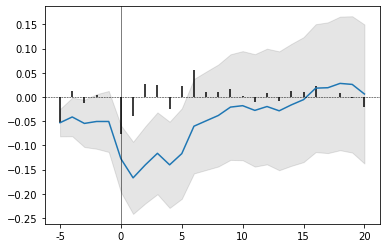

In [26]:
savefig(event.plot(AR=True),'single_event_plot.png')
plt.show()

2. Or in a table:

In [37]:
rst_table(event.results(decimals=[3,5,3,5,2,2]))

event.results()

====  ======  =============  ==========  ==============  ========  =========
  ..      AR    Variance AR  CAR           Variance CAR    T-stat    P-value
====  ======  =============  ==========  ==============  ========  =========
  -5  -0.053        0.00048  -0.053 **          0.00048     -2.42       0.01
  -4   0.012        0.00048  -0.041 *           0.00096     -1.33       0.09
  -3  -0.013        0.00048  -0.055 *           0.00144     -1.43       0.08
  -2   0.004        0.00048  -0.051             0.00192     -1.15       0.13
  -1   0            0.00048  -0.051             0.00241     -1.03       0.15
   0  -0.077        0.00048  -0.128 **          0.00289     -2.37       0.01
   1  -0.039        0.00048  -0.167 ***         0.00337     -2.88       0
   2   0.027        0.00048  -0.14 **           0.00385     -2.26       0.01
   3   0.024        0.00048  -0.116 **          0.00433     -1.77       0.04
   4  -0.024        0.00048  -0.14 **           0.00481     -2.02       0.02
  

,AR,Variance AR,CAR,Variance CAR,T-stat,P-value
-5,-0.053,0.0,-0.053 ***,0.000,-2.418,0.008
-4,0.012,0.0,-0.041 *,0.001,-1.327,0.093
-3,-0.013,0.0,-0.055 *,0.001,-1.435,0.076
-2,0.004,0.0,-0.051,0.002,-1.152,0.125
-1,0.000,0.0,-0.051,0.002,-1.030,0.152
0,-0.077,0.0,-0.128 ***,0.003,-2.374,0.009
1,-0.039,0.0,-0.167 ***,0.003,-2.877,0.002
2,0.027,0.0,-0.14 **,0.004,-2.261,0.012
3,0.024,0.0,-0.116 **,0.004,-1.767,0.039
4,-0.024,0.0,-0.14 **,0.005,-2.020,0.022


## Example 2: A sample of events

In [49]:
AAPL_10K = es.EventStudyBatch.from_csv('AAPL_10K.csv', ev.EventStudy.FamaFrench_3factor, date_format = '%d/%m/%Y')

Tips: Get more details on errors by calling EventStudyBatch.error_report() method or by exploring EventStudyBatch.errors class variable.


In [50]:
print(AAPL_10K.error_report())

Error Report

3 errors due to data unavailability.
The respective events was not processed and thus removed from the sample.
It does not affect the computation of other events.

Help 1: Check if the company was quoted at this date, 
Help 2: For event study modelised used Fama-French models,
        check if the Fama-French dataset imported is up-to-date.
Tips:   Re-import all parameters and re-run the event study analysis.

Details
(You can find more details on errors in the documentation.)

Error              Date                       Parameters                             
------------------ -------------------------- -----------------------------------------
DateMissingError   2019-10-05T00:00:00.000000 security_ticker: AAPL; market_ticker: SPY
Description: Date (2019-10-05T00:00:00.000000) is missing in parameter: FamaFrench.

DateMissingError   2019-10-05T00:00:00.000000 security_ticker: MSFT; market_ticker: SPY
Description: Date (2019-10-05T00:00:00.000000) is missing in paramet

        AR  Variance AR        CAR  Variance CAR  T-stat  P-value
-10 -0.010     0.000109      -0.01      0.000109   -0.98     0.16
-9  -0.014     0.000109   -0.024 *      0.000217   -1.66     0.05
-8   0.002     0.000109     -0.023      0.000326   -1.26     0.10
-7  -0.001     0.000109     -0.024      0.000434   -1.15     0.13
-6  -0.003     0.000109     -0.027      0.000543   -1.15     0.13
-5   0.014     0.000109     -0.013      0.000651   -0.51     0.30
-4   0.012     0.000109     -0.001      0.000760   -0.04     0.49
-3  -0.013     0.000109     -0.014      0.000868   -0.48     0.31
-2  -0.003     0.000109     -0.017      0.000977   -0.54     0.29
-1   0.063     0.000109    0.046 *      0.001085    1.39     0.08
0    0.036     0.000109   0.082 **      0.001194    2.36     0.01
1   -0.003     0.000109   0.079 **      0.001302    2.18     0.02
2   -0.006     0.000109   0.073 **      0.001411    1.94     0.03
3    0.006     0.000109   0.079 **      0.001519    2.02     0.02
4    0.009

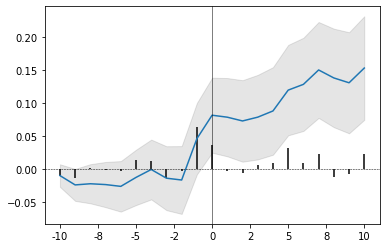

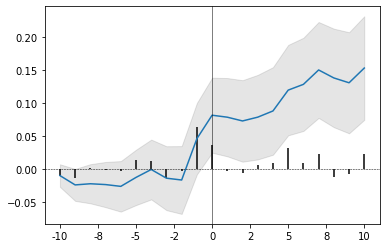

In [51]:
event = es.EventStudy.market_model('AAPL', 'SPY', np.datetime64('2018-11-05'), event_window=(-10,+10))
print(event.results(decimals = [3,6,3,6,2,2]))
event.plot(AR = True, confidence = .95)

In [18]:
AAPL_10K.errors

[{'security_ticker': 'AAPL',
  'market_ticker': 'SPY',
  'event_date': numpy.datetime64('2019-10-05T00:00:00.000000'),
  'error_type': 'DateMissingError',
  'error_msg': 'Date (2019-10-05T00:00:00.000000) is missing in parameter: FamaFrench.'},
 {'security_ticker': 'MSFT',
  'market_ticker': 'SPY',
  'event_date': numpy.datetime64('2019-10-05T00:00:00.000000'),
  'error_type': 'DateMissingError',
  'error_msg': 'Date (2019-10-05T00:00:00.000000) is missing in parameter: FamaFrench.'},
 {'security_ticker': 'GOOG',
  'market_ticker': 'SPY',
  'event_date': numpy.datetime64('2019-10-05T00:00:00.000000'),
  'error_type': 'ColumnMissingError',
  'error_msg': 'GOOG ticker is not available in returns parameter.'}]

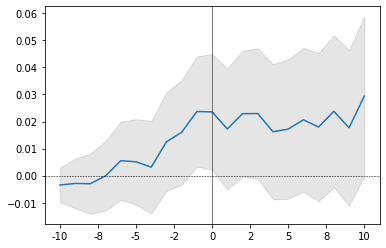

,AAR,Variance AAR,CAAR,Variance CAAR,T-stat,P-value
-10,-0.003,0.0,-0.003,0.000,-0.690,0.245
-9,0.001,0.0,-0.003,0.000,-0.404,0.343
-8,-0.000,0.0,-0.003,0.000,-0.342,0.366
-7,0.003,0.0,-0.0,0.000,-0.007,0.497
-6,0.006,0.0,0.006,0.000,0.493,0.311
-5,-0.000,0.0,0.005,0.000,0.415,0.339
-4,-0.002,0.0,0.003,0.000,0.236,0.407
-3,0.009,0.0,0.013,0.000,0.880,0.189
-2,0.004,0.0,0.016,0.000,1.062,0.144
-1,0.008,0.0,0.024 *,0.000,1.491,0.068


,Mean,Variance,Kurtosis,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,-0.003,0.001,9.278,-0.139,-0.005,0.001,0.006,0.072
-9,-0.003,0.001,6.295,-0.131,-0.010,-0.004,0.010,0.125
-8,-0.003,0.003,2.912,-0.152,-0.020,0.004,0.021,0.159
-7,-0.000,0.004,2.574,-0.152,-0.026,0.007,0.025,0.206
-6,0.006,0.006,2.308,-0.150,-0.023,-0.003,0.027,0.224
-5,0.005,0.006,1.573,-0.155,-0.025,-0.007,0.031,0.207
-4,0.003,0.007,1.394,-0.208,-0.035,-0.006,0.034,0.207
-3,0.013,0.008,0.378,-0.191,-0.039,0.001,0.054,0.212
-2,0.016,0.007,0.417,-0.175,-0.035,0.004,0.059,0.221
-1,0.024,0.007,-0.552,-0.131,-0.021,0.026,0.068,0.200


In [19]:
AAPL_10K.plot()
plt.show()
display(AAPL_10K.results())
display(AAPL_10K.get_CAR_dist())

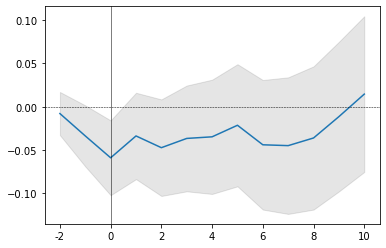

,AR,Variance AR,CAR,Variance CAR,T-stat,P-value
-2,-0.008,0.0,-0.008,0.000,-0.408,0.342
-1,-0.026,0.0,-0.034,0.001,-1.229,0.110
0,-0.025,0.0,-0.059 **,0.001,-1.755,0.040
1,0.025,0.0,-0.034,0.002,-0.870,0.193
2,-0.014,0.0,-0.047,0.002,-1.090,0.138
3,0.011,0.0,-0.037,0.002,-0.770,0.221
4,0.002,0.0,-0.035,0.003,-0.677,0.249
5,0.013,0.0,-0.021,0.003,-0.390,0.348
6,-0.023,0.0,-0.044,0.003,-0.755,0.225
7,-0.001,0.0,-0.045,0.004,-0.732,0.232


In [20]:
CM = es.EventStudy.constant_mean('AAPL',
        np.datetime64('2013-03-04'),
        event_window = (-2,+10), 
        estimation_size = 300,
        buffer_size = 30)

CM.plot()
plt.show()
CM.results()

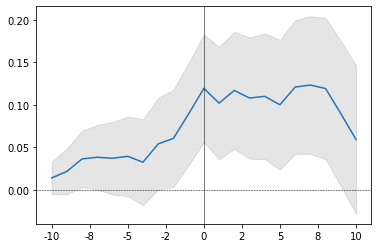

,AR,Variance AR,CAR,Variance CAR,T-stat,P-value
-10,0.014,0.0,0.014,0.000,0.930,0.176
-9,0.008,0.0,0.022,0.000,1.028,0.152
-8,0.015,0.0,0.036 *,0.001,1.409,0.080
-7,0.002,0.0,0.038,0.001,1.286,0.100
-6,-0.001,0.0,0.037,0.001,1.113,0.133
-5,0.002,0.0,0.039,0.001,1.080,0.140
-4,-0.007,0.0,0.032,0.002,0.822,0.206
-3,0.022,0.0,0.054,0.002,1.283,0.100
-2,0.006,0.0,0.06 *,0.002,1.354,0.088
-1,0.029,0.0,0.089 **,0.002,1.899,0.029


In [21]:
MM = es.EventStudy.market_model('AAPL','SPY',
        event_date = np.datetime64('2013-03-04'),
        event_window = (-10,+10), 
        estimation_size = 400,
        buffer_size = 30)

MM.plot()
plt.show()

MM.results()

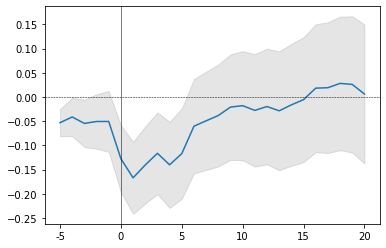

|    |     AR |   Variance AR | CAR        |   Variance CAR |   T-stat |   P-value |
|---:|-------:|--------------:|:-----------|---------------:|---------:|----------:|
| -5 | -0.053 |             0 | -0.053 *** |          0     |   -2.418 |     0.008 |
| -4 |  0.012 |             0 | -0.041 *   |          0.001 |   -1.327 |     0.093 |
| -3 | -0.013 |             0 | -0.055 *   |          0.001 |   -1.435 |     0.076 |
| -2 |  0.004 |             0 | -0.051     |          0.002 |   -1.152 |     0.125 |
| -1 |  0     |             0 | -0.051     |          0.002 |   -1.03  |     0.152 |
|  0 | -0.077 |             0 | -0.128 *** |          0.003 |   -2.374 |     0.009 |
|  1 | -0.039 |             0 | -0.167 *** |          0.003 |   -2.877 |     0.002 |
|  2 |  0.027 |             0 | -0.14 **   |          0.004 |   -2.261 |     0.012 |
|  3 |  0.024 |             0 | -0.116 **  |          0.004 |   -1.767 |     0.039 |
|  4 | -0.024 |             0 | -0.14 **   |          0.005 |   -

In [52]:
#January 9, 2007

iphone1 = es.EventStudy.FamaFrench_3factor('AAPL',
        event_date = np.datetime64('2007-01-09'),
        event_window = (-5,+20), 
        estimation_size = 300,
        buffer_size = 30)

iphone1.plot()
plt.show()

print(tabulate(iphone1.results(), tablefmt="pipe", headers="keys"))